In [1]:
import liionpack as lp
import pybamm
import numpy as np
import os
import matplotlib.pyplot as plt

plt.close("all")
lp.set_logging_level("NOTICE")

names = ["8P-1S", "4P-2S", "2S-4P", "2P-4S", "4S-2P", "8S-1P"]
case = 0
C = 5.0
# Define parameters

_Np = [8, 4, 4, 2, 2, 1]
_Ns = [1, 2, 2, 4, 4, 8]
_I = C * np.array(_Np)
configurations = [
    "parallel-strings",
    "parallel-strings",
    "series-groups",
    "parallel-strings",
    "series-groups",
    "parallel-strings",
]

Iapp = _I[case]
Np = _Np[case]
Ns = _Ns[case]
Nb = Np * Ns
configuration = configurations[case]
name = names[case]

# Generate the netlist
netlist = lp.setup_circuit(Np=Np, Ns=Ns, Rb=1e-4, I=C, configuration=configuration)
# lp.draw_circuit(netlist)

# Define additional output variables
output_variables = ["Volume-averaged cell temperature [K]"]

# Define a cycling experiment using PyBaMM
experiment = pybamm.Experiment(
    [
        f"Discharge at {Iapp} A for 1 hour or until 3.0 V",
        "Rest for 30 minutes",
        f"Charge at {Iapp / 2} A for 2 hours or until 4.1 V",
        "Rest for 30 minutes",
    ],
    period="10 seconds",
)

# Define the PyBaMM parameters
parameter_values = pybamm.ParameterValues("Chen2020")
parameter_values.update(
    {
        "Negative electrode active material volume fraction": "[input]",
        "Positive electrode active material volume fraction": "[input]",
    }
)
inputs = {
    "Total heat transfer coefficient [W.m-2.K-1]": 10 + (np.random.random(Nb) * 1.0),
    "Negative electrode active material volume fraction": 0.75
    + (np.random.random(Nb) * 0.01),
    "Positive electrode active material volume fraction": 0.66
    + (np.random.random(Nb) * 0.01),
}

# Solve the pack
output = lp.solve(
    netlist=netlist,
    sim_func=lp.thermal_simulation,
    parameter_values=parameter_values,
    experiment=experiment,
    output_variables=output_variables,
    initial_soc=None,
    inputs=inputs,
    nproc=os.cpu_count(),
    manager="casadi",
)

/home/ruihe_li/Env_liionpack/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-07 11:14:09,021	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
Stepping simulation: 100%|██████████| 180/180 [00:04<00:00, 40.26it/s]


In [3]:
netlist

,desc,node1,node2,value,node1_x,node1_y,node2_x,node2_y,power_loss
0,Rbn0,1,2,0.000100,0,0,1,0,2.190403e-07
1,Rbn1,2,3,0.000100,1,0,2,0,5.614758e-07
2,Rbn2,3,4,0.000100,2,0,3,0,7.659915e-07
3,Rbn3,4,5,0.000100,3,0,4,0,7.618891e-07
4,Rbn4,5,6,0.000100,4,0,5,0,5.606237e-07
5,Rbn5,6,7,0.000100,5,0,6,0,2.878429e-07
6,Rbn6,7,8,0.000100,6,0,7,0,7.444643e-08
7,Rc0,9,1,0.010000,0,1,0,0,2.190403e-05
8,V0,17,9,3.976805,0,2,0,1,0.000000e+00
9,Ri0,25,17,0.026342,0,3,0,2,0.000000e+00


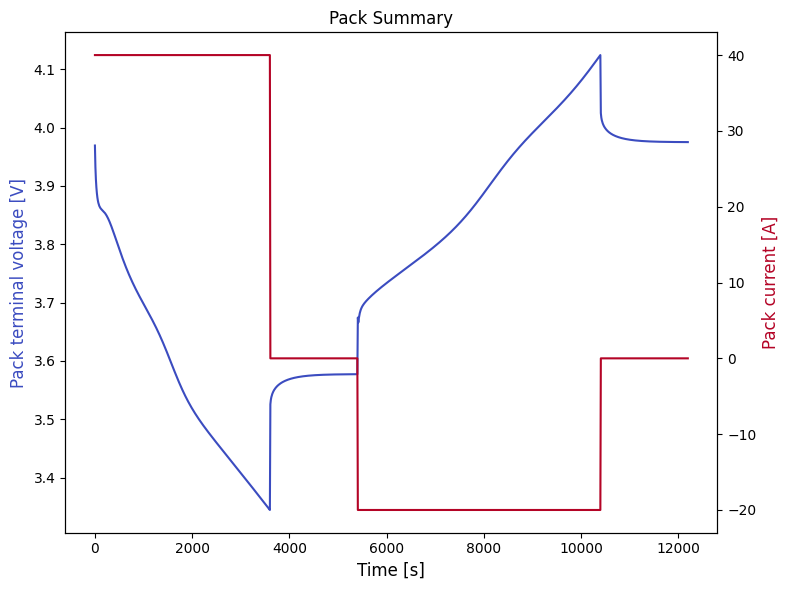

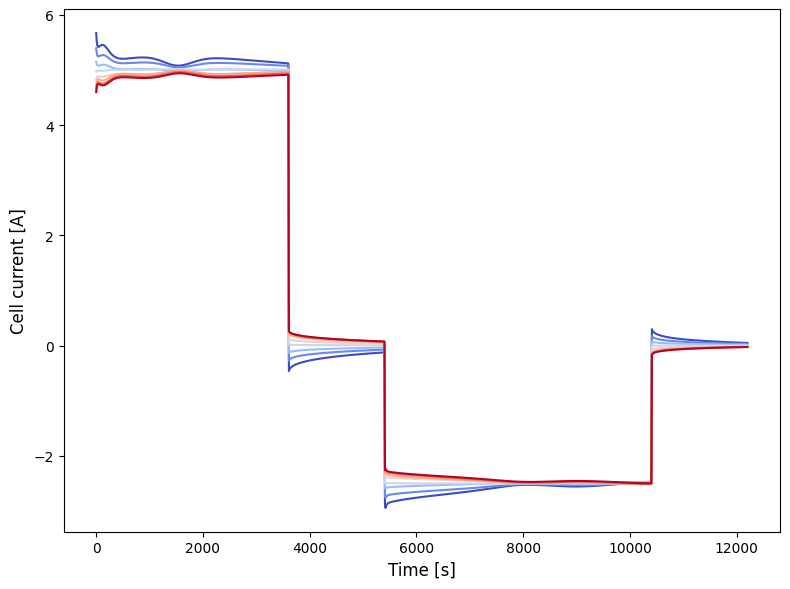

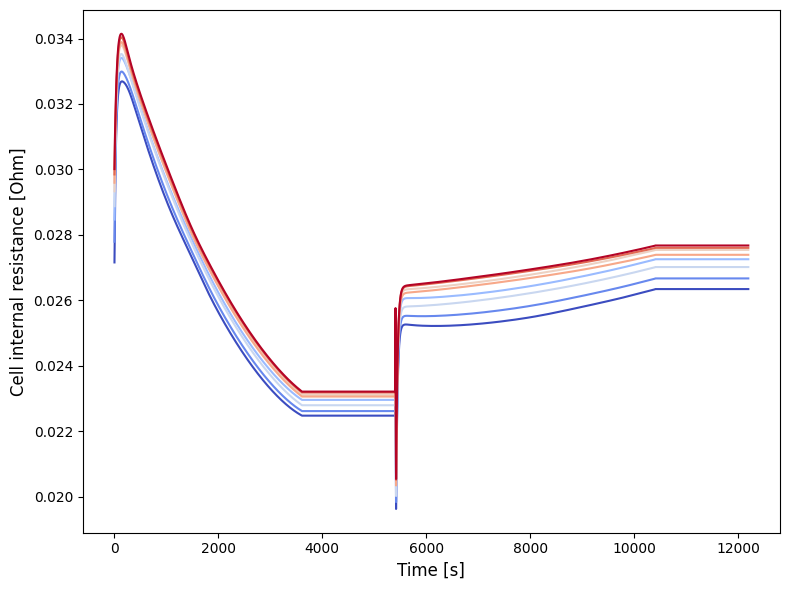

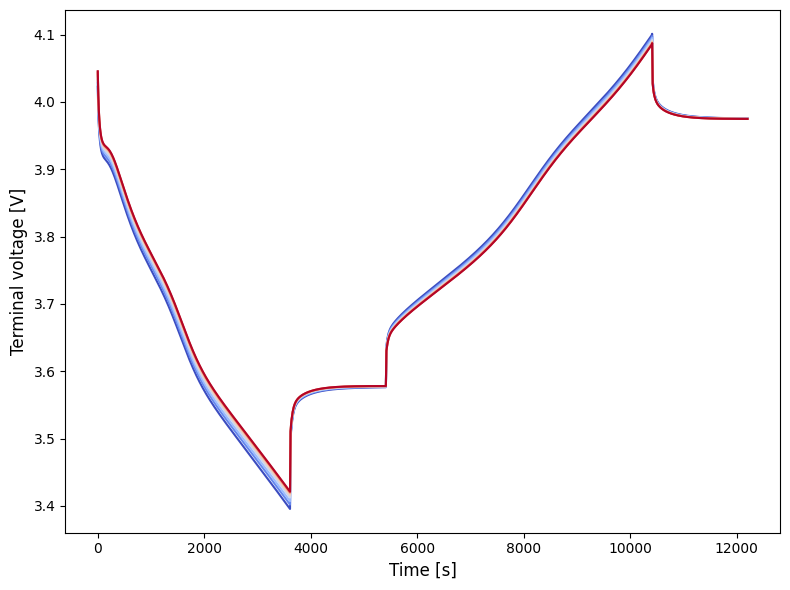

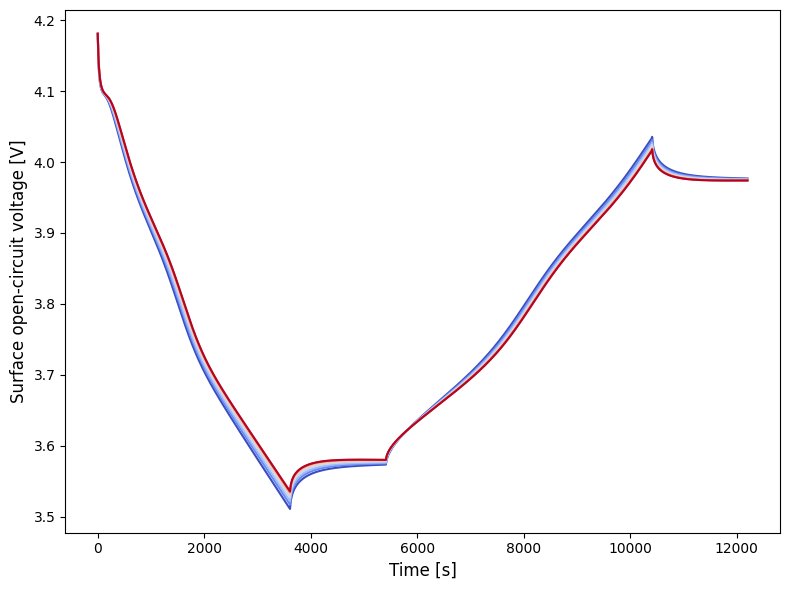

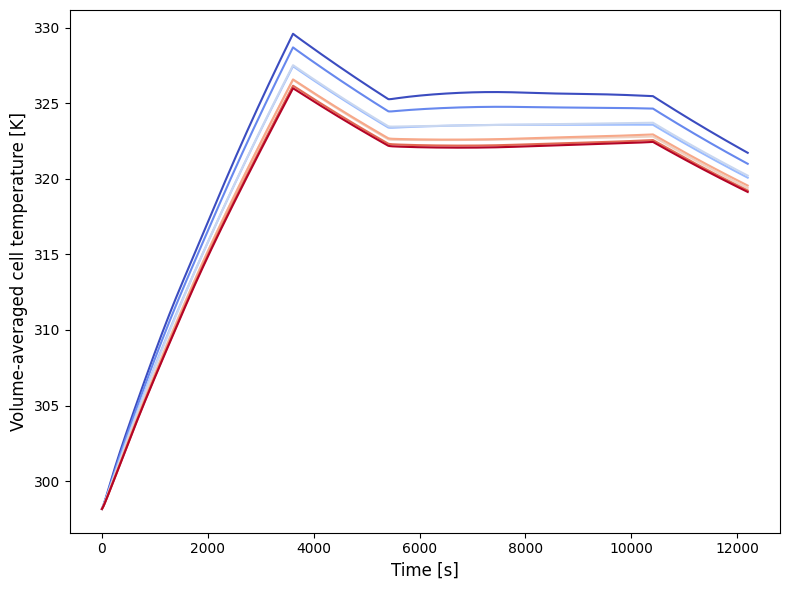

In [2]:
# Plot the pack and individual cell results
lp.plot_pack(output, color="white")
lp.plot_cells(output, color="white")

lp.show_plots()
